# Exercise 5

Authors: Joseph Weibel, Rebecka Fahrni

In [5]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(10)


## Exercise 1a 
Loading data

In [4]:
# load datasets
data = np.load('data/data_all_button_press_window_events_hg.npy')

print('number of electrodes:  ', data.shape[1])
print('number of time samples:', data.shape[0])

number of electrodes:   199
number of time samples: 57


In [8]:
centers = data[:, np.random.choice(data.shape[1], 5, replace=False)]
centers.shape

(57, 5)

In [10]:
cdist(data.T, centers.T, 'euclidean').shape

(199, 5)

## Exercise 1b

Implement Fuzzy-C Means Clustering

In [37]:
0 ** 2

0

In [48]:
def cluster(data, k):
	D = 3.5

	# 1st step: choose k random elctrodes as initial cluster centers
	centers = data[:, np.random.choice(data.shape[1], k, replace=False)]

	labels = None
	for iter in range(100): # stop after 100 iterations to avoid infinite loops
		# 2nd step: update the cluster assignment
		dist = cdist(data.T, centers.T, 'sqeuclidean')
		new_labels = np.zeros(dist.shape)
		for i in range(data.shape[1]):
			for j in range(k):
				new_labels[i, j] = 1 / np.sum((dist[i, j] / dist[i]) ** (1 / (D - 1)))

		# 3rd step: check for convergence
		if labels is not None and np.all(new_labels == labels):
			print(f'convergence after {iter+1} steps')
			break

		labels = new_labels

		# 4th step: update the cluster centers based on the new assignment
		for j in range(k):
			centers[:, j] = (data @ (labels[:, j] ** D)) / (labels[:, j] ** D).sum()

	# last step: calculate total squared distance
	dist = cdist(data.T, centers.T, 'sqeuclidean')
	total_squared_distance = (dist * (labels ** D)).sum()

	return total_squared_distance, labels.argmin(axis=1)


## Exercise 1c

Test different values for $k$

/var/folders/zl/w6zt87md14j4524by47x78j00000gq/T/ipykernel_92069/936923528.py:14: RuntimeWarning: divide by zero encountered in divide
  new_labels[i, j] = 1 / np.sum((dist[i, j] / dist[i]) ** (1 / (D - 1)))
/var/folders/zl/w6zt87md14j4524by47x78j00000gq/T/ipykernel_92069/936923528.py:14: RuntimeWarning: invalid value encountered in divide
  new_labels[i, j] = 1 / np.sum((dist[i, j] / dist[i]) ** (1 / (D - 1)))


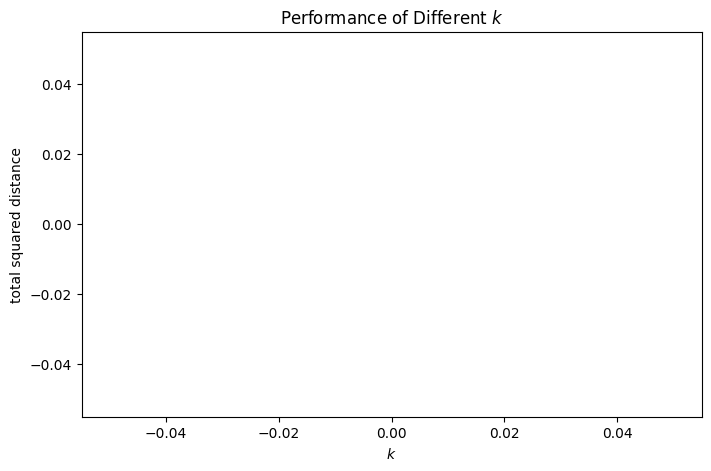

In [49]:
k_values = np.arange(2, 6 + 1)
distances = []

# try different k
for k in k_values:
	distance, _ = cluster(data, k)
	distances.append(distance)

# plot distances
plt.figure(figsize=(8, 5))
plt.plot(k_values, distances)
plt.title('Performance of Different $k$')
plt.xlabel('$k$')
plt.ylabel('total squared distance')
plt.show()